<a href="https://colab.research.google.com/github/Prabhu-04/Kaggle-Codes/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.3.0'

In [4]:
keras.__version__

'2.4.0'

In [5]:
fas=keras.datasets.fashion_mnist
(X_tr_full,y_tr_full),(X_test,y_test)=fas.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_tr_full.shape

(60000, 28, 28)

In [7]:
X_tr_full.dtype

dtype('uint8')

In [8]:
X_valid,X_tr=X_tr_full[:5000]/255.0,X_tr_full[5000:]/255.0
y_valid,y_tr=y_tr_full[:5000],y_tr_full[5000:]

In [9]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [10]:
class_names[y_tr[0]]

'Coat'

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [20]:
history=model.fit(X_tr,y_tr,epochs=35,validation_data=(X_valid,y_valid))

Epoch 1/35
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1186 - accuracy: 0.9588 - val_loss: 0.3111 - val_accuracy: 0.8962
Epoch 2/35
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1156 - accuracy: 0.9600 - val_loss: 0.3093 - val_accuracy: 0.9002
Epoch 3/35
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1142 - accuracy: 0.9604 - val_loss: 0.3089 - val_accuracy: 0.8988
Epoch 4/35
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1127 - accuracy: 0.9612 - val_loss: 0.3348 - val_accuracy: 0.8932
Epoch 5/35
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9617 - val_loss: 0.3190 - val_accuracy: 0.9038
Epoch 6/35
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9627 - val_loss: 0.3159 - val_accuracy: 0.8994
Epoch 7/35
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1081 - accuracy: 0.9625 - val_loss: 0.3335 - val_accuracy:

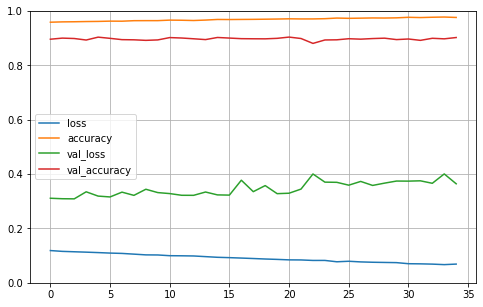

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 94.1406 - accuracy: 0.8631


[94.14055633544922, 0.863099992275238]

In [23]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
y_pred=model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [26]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
y_test[:3]

array([9, 2, 1], dtype=uint8)